# Import

In [2]:
import numpy as np
from scipy.stats import norm
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import statistics
from scipy import signal
from scipy.optimize import curve_fit
import scipy.fftpack
from scipy import interpolate
from cycler import cycler

In [3]:
%matplotlib notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Reading files

In [4]:
common_folder = "/home/gorbunov8a/data/filtered_advection/"

Rl = 60; N=128
#run_files=[142, 133]
run_files=[50]
spec_type = "lin"
nb_of_runs = len(run_files)

folder_in = "filtered/"
spec_component = "avg"
correlation_type = "transfer_corr"
# read transport files
for run_index in list(range(nb_of_runs)) :
    folder = common_folder + "rl" + str(Rl) + "_N" + str(N) + "/" + folder_in + "run" + "%01d" % (run_index+1) + "/"
    if (run_files[run_index] < 1000) :
        file = folder + correlation_type + "_" + spec_type + "_C" + spec_component + "_wi=" + "%03d" % run_files[run_index] + ".table"
    else : 
        file = folder + correlation_type + "_" + spec_type + "_C" + spec_component + "_wi=" + "%06d" % run_files[run_index] + ".table"
    file_data = []
    averaging_weight = (run_files[run_index]+1)/(sum(run_files)+nb_of_runs)
    for line in open(file) :
        temp_array_line = []
        if line[0] == '#' :          #skip commented lines
            continue
        else :
            temp_array_line=list(map(float, line.split( )))
            temp_array_line = [t * averaging_weight for t in temp_array_line]
            file_data.append(temp_array_line)  
    if (run_index == 0) : 
        accumulated_data = file_data.copy()
    else : 
        accumulated_data = list(map(lambda l1, l2: [sum(x) for x in zip(l1, l2)], accumulated_data, file_data))
#averaging_coef = 1.0/nb_of_runs
averaging_coef = 1.0
k = np.array(accumulated_data[0])*averaging_coef
nb_of_modes = np.array(accumulated_data[1])*averaging_coef

average_data = np.ndarray(shape=(len(accumulated_data)-2, k.shape[0]+1), dtype=float)
for i in list(range(average_data.shape[0])) : 
    average_data[i, :] = np.array(accumulated_data[i+2])*averaging_coef
t = average_data[:,0]
transfer_f1 = np.array(average_data[:,1:])
del average_data, file_data, accumulated_data

spec_component = "xx"
correlation_type = "two_point_corr"
#read variance files
for run_index in list(range(nb_of_runs)) :
    folder = common_folder + "rl" + str(Rl) + "_N" + str(N) + "/" + folder_in + "run" + "%01d" % (run_index+1) + "/"
    if (run_files[run_index] < 1000) :
        file = folder + correlation_type + "_" + spec_type + "_C" + spec_component + "_wi=" + "%03d" % run_files[run_index] + ".table"
    else : 
        file = folder + correlation_type + "_" + spec_type + "_C" + spec_component + "_wi=" + "%06d" % run_files[run_index] + ".table"
    file_data = []
    averaging_weight = (run_files[run_index]+1)/(sum(run_files)+nb_of_runs)
    for line in open(file) :
        temp_array_line = []
        if line[0] == '#' :          #skip commented lines
            continue
        else :
            temp_array_line=list(map(float, line.split( )))
            temp_array_line = [t * averaging_weight for t in temp_array_line]
            file_data.append(temp_array_line)
    if not('accumulated_data' in dir()) : 
        accumulated_data = file_data.copy()
    else : 
        accumulated_data = list(map(lambda l1, l2: [sum(x) for x in zip(l1, l2)], accumulated_data, file_data))
averaging_coef = 1.0
average_data = np.ndarray(shape=(len(accumulated_data)-2, k.shape[0]+1), dtype=float)
for i in list(range(average_data.shape[0])) : 
    average_data[i, :] = np.array(accumulated_data[i+2])*averaging_coef
correlation = np.array(average_data[:,1:])

del average_data, file_data, accumulated_data

folder_in = "non_filtered/"
spec_component = "avg"
correlation_type = "transfer_corr"
# read transport files
for run_index in list(range(nb_of_runs)) :
    folder = common_folder + "rl" + str(Rl) + "_N" + str(N) + "/" + folder_in + "run" + "%01d" % (run_index+1) + "/"
    if (run_files[run_index] < 1000) :
        file = folder + correlation_type + "_" + spec_type + "_C" + spec_component + "_wi=" + "%03d" % run_files[run_index] + ".table"
    else : 
        file = folder + correlation_type + "_" + spec_type + "_C" + spec_component + "_wi=" + "%06d" % run_files[run_index] + ".table"
    file_data = []
    averaging_weight = (run_files[run_index]+1)/(sum(run_files)+nb_of_runs)
    for line in open(file) :
        temp_array_line = []
        if line[0] == '#' :          #skip commented lines
            continue
        else :
            temp_array_line=list(map(float, line.split( )))
            temp_array_line = [t * averaging_weight for t in temp_array_line]
            file_data.append(temp_array_line)  
    if (run_index == 0) : 
        accumulated_data = file_data.copy()
    else : 
        accumulated_data = list(map(lambda l1, l2: [sum(x) for x in zip(l1, l2)], accumulated_data, file_data))
#averaging_coef = 1.0/nb_of_runs
averaging_coef = 1.0

average_data = np.ndarray(shape=(len(accumulated_data)-2, k.shape[0]+1), dtype=float)
for i in list(range(average_data.shape[0])) : 
    average_data[i, :] = np.array(accumulated_data[i+2])*averaging_coef
t = average_data[:,0]
transfer_nf = np.array(average_data[:,1:])
del average_data, file_data, accumulated_data


folder_in = "filtered2/"
spec_component = "avg"
correlation_type = "transfer_corr"
# read transport files
for run_index in list(range(nb_of_runs)) :
    folder = common_folder + "rl" + str(Rl) + "_N" + str(N) + "/" + folder_in + "run" + "%01d" % (run_index+1) + "/"
    if (run_files[run_index] < 1000) :
        file = folder + correlation_type + "_" + spec_type + "_C" + spec_component + "_wi=" + "%03d" % run_files[run_index] + ".table"
    else : 
        file = folder + correlation_type + "_" + spec_type + "_C" + spec_component + "_wi=" + "%06d" % run_files[run_index] + ".table"
    file_data = []
    averaging_weight = (run_files[run_index]+1)/(sum(run_files)+nb_of_runs)
    for line in open(file) :
        temp_array_line = []
        if line[0] == '#' :          #skip commented lines
            continue
        else :
            temp_array_line=list(map(float, line.split( )))
            temp_array_line = [t * averaging_weight for t in temp_array_line]
            file_data.append(temp_array_line)  
    if (run_index == 0) : 
        accumulated_data = file_data.copy()
    else : 
        accumulated_data = list(map(lambda l1, l2: [sum(x) for x in zip(l1, l2)], accumulated_data, file_data))
#averaging_coef = 1.0/nb_of_runs
averaging_coef = 1.0

average_data = np.ndarray(shape=(len(accumulated_data)-2, k.shape[0]+1), dtype=float)
for i in list(range(average_data.shape[0])) : 
    average_data[i, :] = np.array(accumulated_data[i+2])*averaging_coef
t = average_data[:,0]
transfer_f2 = np.array(average_data[:,1:])
del average_data, file_data, accumulated_data

# Define parameters

In [12]:
# PARAMETERS
nu = 0.01
pi = np.pi
if (Rl == 60) :
    lmbda = 0.378
    eta = 0.0254807  
    L = 2.23  
    dissipation_rate = 2.37307
    e_kine = 3.52497
t0=dissipation_rate**(-1/3)*L**(2/3) #large scale eddy-turnover time
print(t0)
spatial_scales = np.array([L, lmbda, eta])
normalization_status = True

cut_off_k1 = 2.3931 + 2.0
cut_off_k2 = 2.3931 + 5.0

1.2796751181885695


In [6]:
#check the integral scale
l_large=eta*(3/20*Rl)**2
print(l_large)

2.0639366999999997


In [7]:
#check urms
Urms1 = np.sqrt(2.0*e_kine/3.0)
print(Urms1)

Urms2 = L**(1.0/3.0)*dissipation_rate**(1/3)
print(Urms2)

1.5329644483809792
1.7426298036931849


# Normalization

In [8]:
t_length=t.shape[0]
wavenumbers_length=k.shape[0]
if normalization_status :
#     k_norm_coef = L
#     t_norm_coef = 1.0/t0
#     t=t*t_norm_coef
#     k=k*k_norm_coef
#     spatial_scales = 1.0/k_norm_coef * spatial_scales
    
    normalization = (correlation[0,:])**(-1)
else : 
    normalization = np.ones(wavenumbers_length)

wn_scales = 2.0*np.pi/spatial_scales
kL = 2.0*pi/L; klmbda = 2.0*pi/lmbda; keta = 2.0*pi/eta

In [9]:
# wavenumber index corresponding to lambda
np.searchsorted(k, wn_scales[1])

16

In [80]:
# inverse time direction
t = -t

# Plotting params

In [81]:
kmin = 10
kmax = 50
nb_of_curves = 20
step = round((kmax - kmin)/nb_of_curves)
indices_of_k_to_plot=list(range(kmin,kmax,step))
#indices_of_k_to_plot.append(40)
print(indices_of_k_to_plot)

plt.rc('axes', labelsize=12)  
plt.rc('axes', titlesize=12)  
plt.rc('legend', fontsize=12)  

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.rc('axes', prop_cycle=cycler(cycler(linestyle=['-', '--', ':', '-.'])*cycler(color=colors)))

[10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48]


# Spatial compensated spectrum from C_2(t=0,k)

<IPython.core.display.Javascript object>


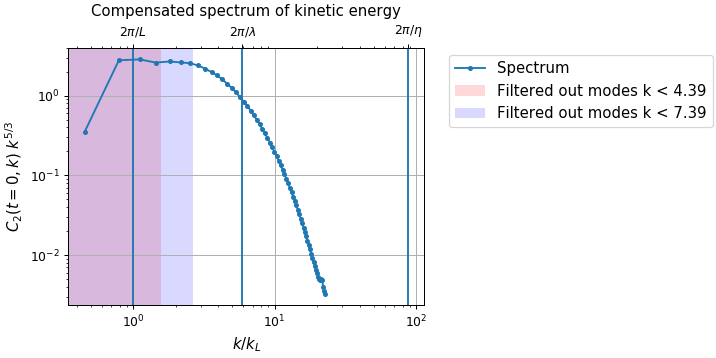

In [82]:
fig, ax = plt.subplots(constrained_layout=True,figsize=(8,4))
kinetic_energy = np.zeros(shape=wavenumbers_length, dtype=float)
for ik in list(range(wavenumbers_length)) : 
    #coefficient = 4.0*np.pi*k[ik]*k[ik]
    coefficient = 4.0*np.pi*k[ik]*k[ik]/nb_of_modes[ik]
    #coefficient = 1.0
    kinetic_energy[ik] = correlation[0,ik]*coefficient
ax.plot(k/kL, kinetic_energy*k**(5.0/3.0), '.-', label='Spectrum')
#ax.plot(k, 5e-4*k**(-5.0/3.0), label=r'$k^{-5/3}$')
ax.set(xscale='log',yscale='log',xlabel=r'$k/k_L$', ylabel=r'$C_2(t=0,k) \ k^{5/3}$', title='Compensated spectrum of kinetic energy')
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid()

vertical_lines=wn_scales/kL
for line in vertical_lines : ax.axvline(x=line)
ax.axvspan(0, cut_off_k1/kL, facecolor='red', alpha=0.15, label='Filtered out modes k < %2.2f' % (cut_off_k1))
ax.axvspan(0, cut_off_k2/kL, facecolor='blue', alpha=0.15, label='Filtered out modes k < %2.2f' % (cut_off_k2))
    
ax2 = ax.twiny()
ax2.set(xscale='log', yscale='log', xlim = ax.get_xlim())
ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Energy transfer spectrum from T(t=0,k)

<IPython.core.display.Javascript object>


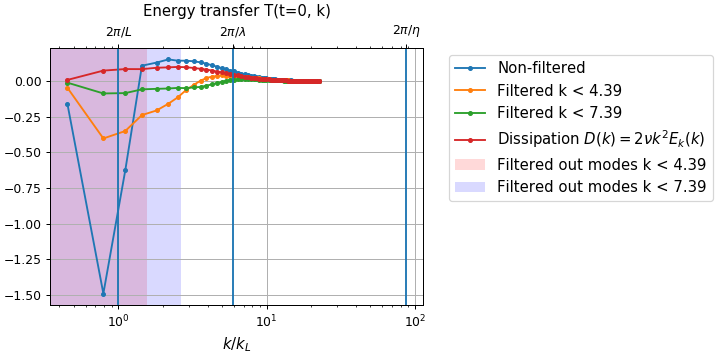

In [64]:
fig, ax = plt.subplots(constrained_layout=True,figsize=(8,4))
transf1_spec = np.zeros(shape=wavenumbers_length, dtype=float)
transf2_spec = np.zeros(shape=wavenumbers_length, dtype=float)
transf_nf_spec = np.zeros(shape=wavenumbers_length, dtype=float)
for ik in list(range(wavenumbers_length)) : 
    #coefficient = 4.0*np.pi*k[ik]*k[ik]
    coefficient = 4.0*np.pi*k[ik]*k[ik]/nb_of_modes[ik]
    #coefficient = 1.0
    transf1_spec[ik] = transfer_f1[0,ik]*coefficient
    transf2_spec[ik] = transfer_f2[0,ik]*coefficient
    transf_nf_spec[ik] = transfer_nf[0,ik]*coefficient
dissipation_spec = 2*nu*kinetic_energy*(k**2.0)
ax.plot(k/kL, transf_nf_spec, '.-', label='Non-filtered')
ax.plot(k/kL, transf1_spec, '.-', label='Filtered k < %2.2f' % (cut_off_k1))
ax.plot(k/kL, transf2_spec, '.-', label='Filtered k < %2.2f' % (cut_off_k2))
ax.plot(k/kL, dissipation_spec, '.-', label=r'Dissipation $D(k) = 2 \nu k^2 E_k(k)$')
#ax.plot(k, 5e-4*k**(-5.0/3.0), label=r'$k^{-5/3}$')
ax.set(xscale='log',yscale='log',xlabel=r'$k/k_L$', title='Energy transfer T(t=0, k)')
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid()

ax.axvspan(0, cut_off_k1/kL, facecolor='red', alpha=0.15, label='Filtered out modes k < %2.2f' % (cut_off_k1))
ax.axvspan(0, cut_off_k2/kL, facecolor='blue', alpha=0.15, label='Filtered out modes k < %2.2f' % (cut_off_k2))

vertical_lines=wn_scales/kL
for line in vertical_lines : ax.axvline(x=line)
ax2 = ax.twiny()
ax2.set(xscale='log', yscale='linear', xlim = ax.get_xlim())
ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Energy flux spectrum from T(t=0,k)

<IPython.core.display.Javascript object>


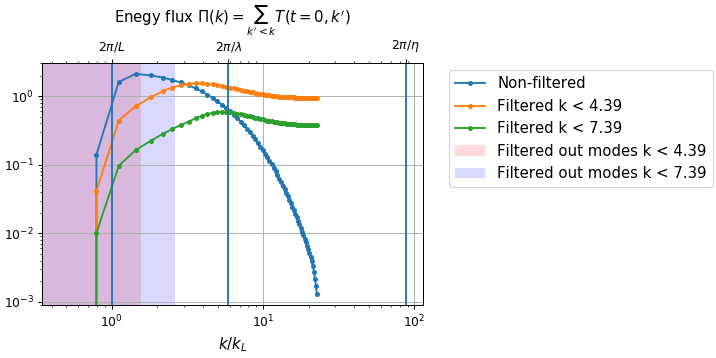

In [62]:
fig, ax = plt.subplots(constrained_layout=True,figsize=(8,4))
flux1_spec = np.zeros(shape=wavenumbers_length, dtype=float)
flux2_spec = np.zeros(shape=wavenumbers_length, dtype=float)
flux_nf_spec = np.zeros(shape=wavenumbers_length, dtype=float)
for ik in list(range(wavenumbers_length)) : 
    #flux_spec[ik] = -np.sum(transf_spec[0:ik])
    #flux_nf_spec[ik] = -np.sum(transf_nf_spec[0:ik])
    flux1_spec[ik] = -np.sum(transfer_f1[0,0:ik])
    flux2_spec[ik] = -np.sum(transfer_f2[0,0:ik])
    flux_nf_spec[ik] = -np.sum(transfer_nf[0,0:ik])
ax.plot(k/kL, flux_nf_spec, '.-', label='Non-filtered')
ax.plot(k/kL, flux1_spec, '.-', label='Filtered k < %2.2f' % (cut_off_k1))
ax.plot(k/kL, flux2_spec, '.-', label='Filtered k < %2.2f' % (cut_off_k2))
#ax.plot(k, 5e-4*k**(-5.0/3.0), label=r'$k^{-5/3}$')
ax.set(xscale='log',yscale='log',xlabel=r'$k/k_L$', title=r'Enegy flux $\Pi(k) = \sum_{k^\prime < k}  T(t=0, k^\prime)$')
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid()

ax.axvspan(0, cut_off_k1/kL, facecolor='red', alpha=0.15, label='Filtered out modes k < %2.2f' % (cut_off_k1))
ax.axvspan(0, cut_off_k2/kL, facecolor='blue', alpha=0.15, label='Filtered out modes k < %2.2f' % (cut_off_k2))

vertical_lines=wn_scales/kL
for line in vertical_lines : ax.axvline(x=line)
ax2 = ax.twiny()
ax2.set(xscale='log', yscale='log', xlim = ax.get_xlim())
ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Total energy transfer time dependance

<IPython.core.display.Javascript object>


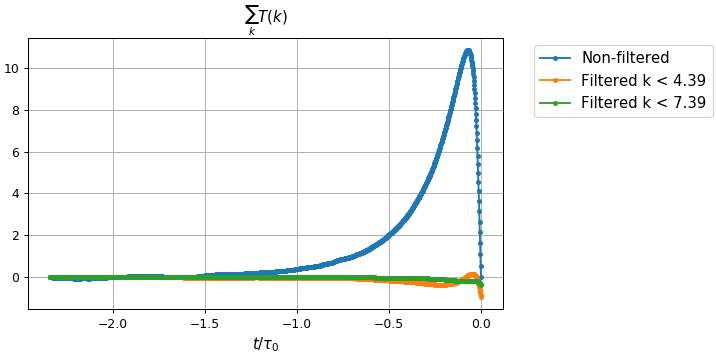

In [83]:
fig, ax = plt.subplots(constrained_layout=True,figsize=(8,4))
ax.plot(t/t0, np.sum(transfer_nf, axis=1), '.-', label='Non-filtered')
ax.plot(t/t0, np.sum(transfer_f1, axis=1), '.-', label='Filtered k < %2.2f' % (cut_off_k1))
ax.plot(t/t0, np.sum(transfer_f2, axis=1), '.-', label='Filtered k < %2.2f' % (cut_off_k2))
ax.set(xlabel=r'$t/\tau_0$', title=r'$\sum_k T(k)$'); ax.grid()
#ax.set(yscale='log')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot C2(k,t) correlation functions

<IPython.core.display.Javascript object>


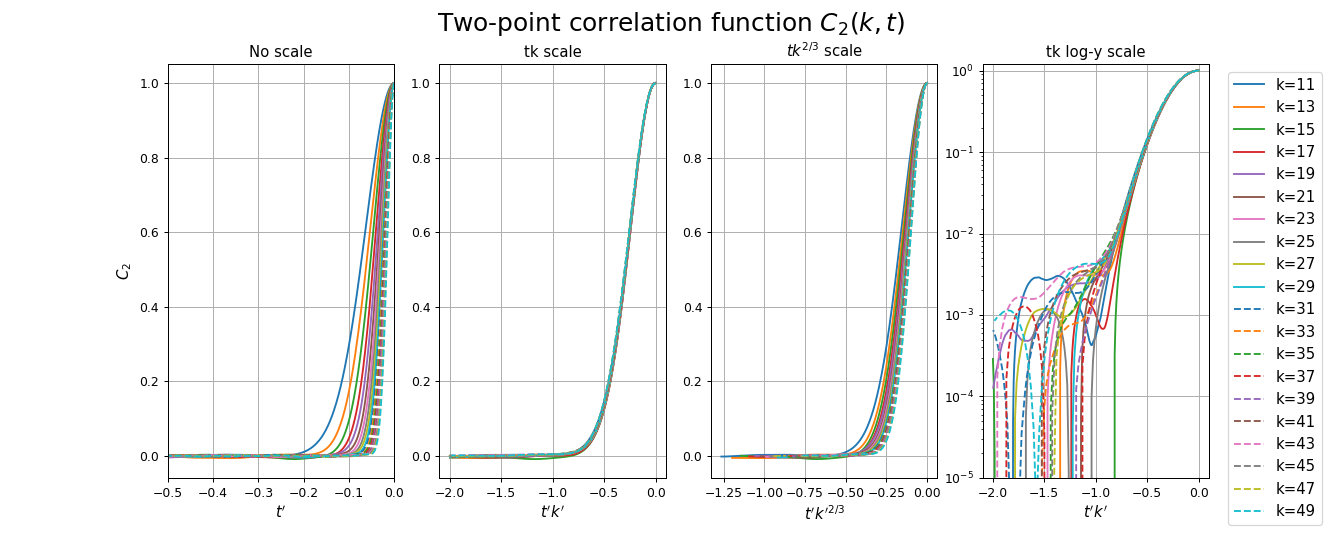

In [87]:
tk1 = 0.0
tk2 = 2.0

fig, (norm_scale, tk_scale, tk23_scale, log_scale) = plt.subplots(nrows=1, ncols=4,figsize=(15,6))
for ik in indices_of_k_to_plot :
    a = np.searchsorted(np.abs(t/t0*k[ik]/kL), tk1)
    b = np.searchsorted(np.abs(t/t0*k[ik]/kL), tk2)
    norm_scale.plot(t/t0, correlation[:,ik]*normalization[ik])
    tk_scale.plot(t[a:b]/t0*(k[ik]/kL), correlation[a:b,ik]*normalization[ik])
    tk23_scale.plot(t[a:b]/t0*(k[ik]/kL)**(2.0/3.0), correlation[a:b,ik]*normalization[ik])
    log_scale.semilogy(t[a:b]/t0*(k[ik]/kL), correlation[a:b,ik]*normalization[ik], label='k=%2.f' % (k[ik]))
norm_scale.set(title='No scale', ylabel=r'$C_2$', xlabel=r'$t^\prime$', xlim=[-0.5,0]); norm_scale.grid()
tk_scale.set(title='tk scale', xlabel=r'$t^\prime k^\prime$'); tk_scale.grid()
tk23_scale.set(title=r'$tk^{2/3}$ scale', xlabel=r'$t^\prime {k^\prime}^{2/3}$'); tk23_scale.grid()
log_scale.set(title='tk log-y scale', xlabel=r'$t^\prime k^\prime$', ylim=[10e-6, 1.2]); log_scale.grid()
log_scale.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

fig.suptitle(r'Two-point correlation function $C_2(k,t)$', size=20) 
plt.show()

# Plot T(k,t) correlation functions

<IPython.core.display.Javascript object>


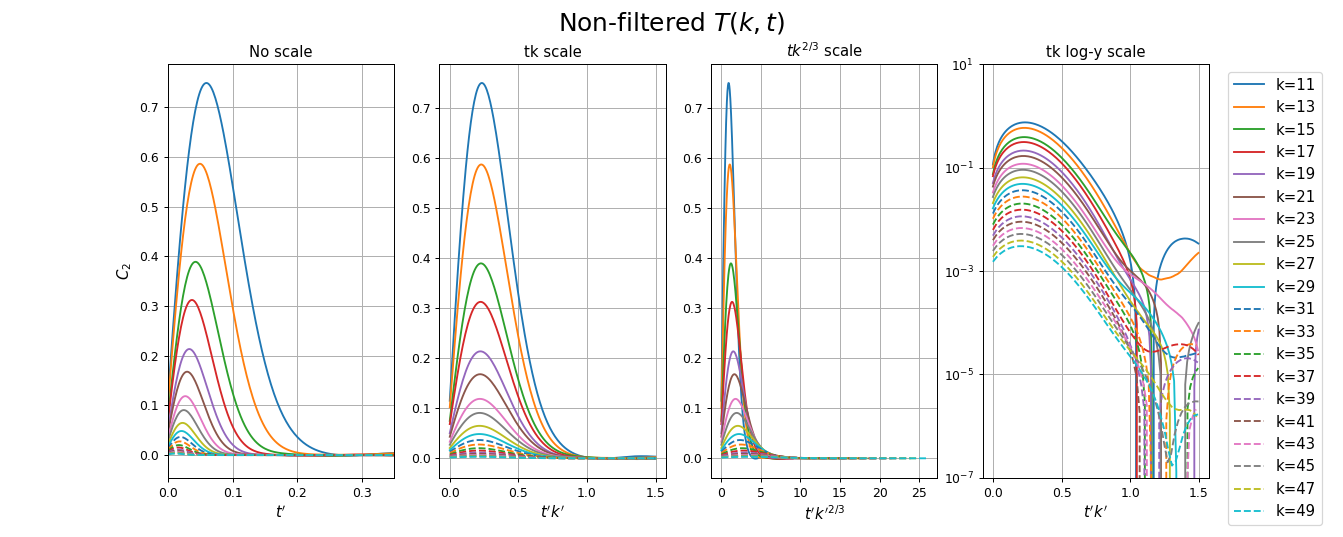

In [79]:
tk1 = 0.0
tk2 = 1.5

transf_norm = np.ones_like(t)    # no normalization
#transf_norm = 1.0/transfer[0,:]
#transf_norm = 1.0/correlation[0,:]
#transf_norm = 1.0/dissipation_spec
#transf_norm = 1.0/np.amax(transfer, axis=0)

fig, (norm_scale, tk_scale, tk23_scale, log_scale) = plt.subplots(nrows=1, ncols=4,figsize=(15,6))
for ik in indices_of_k_to_plot :
    a = np.searchsorted(t/t0*k[ik]/kL, tk1)
    b = np.searchsorted(t/t0*k[ik]/kL, tk2)
    norm_scale.plot(t/t0, transfer_nf[:,ik]*transf_norm[ik])
    tk_scale.plot(t[a:b]/t0*(k[ik]/kL), transfer_nf[a:b,ik]*transf_norm[ik])
    tk23_scale.plot(t[a:b]/t0*(k[ik]/kL)**(2.0), transfer_nf[a:b,ik]*transf_norm[ik])
    log_scale.semilogy(t[a:b]/t0*(k[ik]/kL), transfer_nf[a:b,ik]*transf_norm[ik], label='k=%2.f' % (k[ik]))
norm_scale.set(title='No scale', ylabel=r'$C_2$', xlabel=r'$t^\prime$', xlim=[0, 0.35]); norm_scale.grid()
tk_scale.set(title='tk scale', xlabel=r'$t^\prime k^\prime$'); tk_scale.grid()
tk23_scale.set(title=r'$tk^{2/3}$ scale', xlabel=r'$t^\prime {k^\prime}^{2/3}$'); tk23_scale.grid()
log_scale.set(title='tk log-y scale', xlabel=r'$t^\prime k^\prime$', ylim=[10e-8, 10.0]); log_scale.grid()
log_scale.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#fig.tight_layout()
fig.suptitle(r'Non-filtered $T(k,t)$', size=20) 
plt.show()

<IPython.core.display.Javascript object>


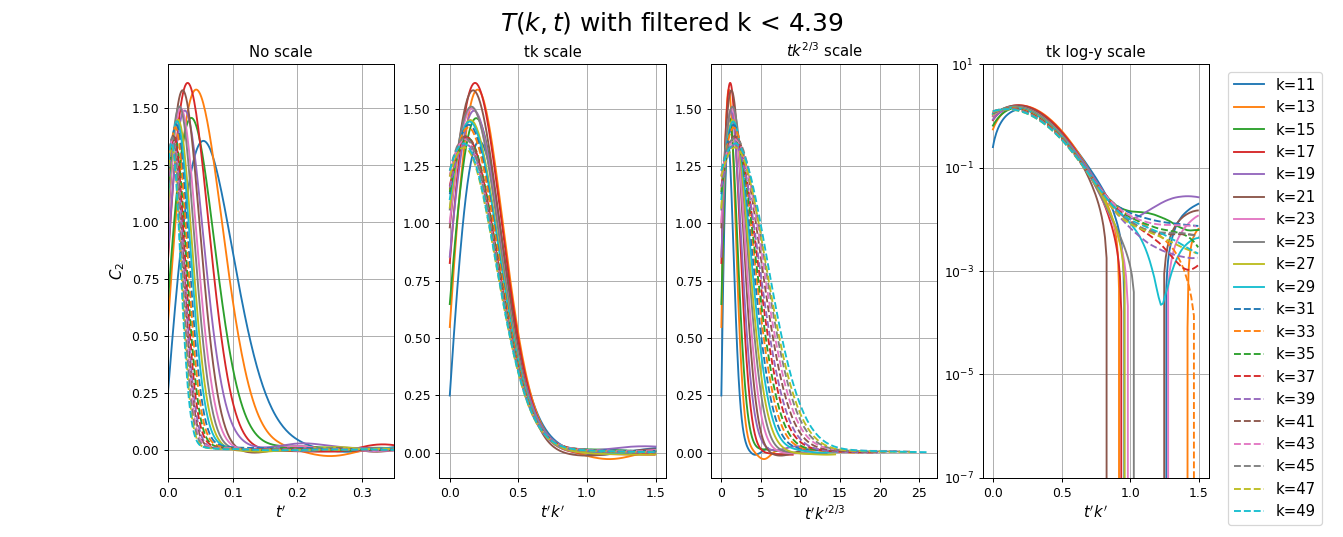

In [68]:
fig, (norm_scale, tk_scale, tk23_scale, log_scale) = plt.subplots(nrows=1, ncols=4,figsize=(15,6))
for ik in indices_of_k_to_plot :
    a = np.searchsorted(t/t0*k[ik]/kL, tk1)
    b = np.searchsorted(t/t0*k[ik]/kL, tk2)
    norm_scale.plot(t/t0, transfer_f1[:,ik]*transf_norm[ik])
    tk_scale.plot(t[a:b]/t0*(k[ik]/kL), transfer_f1[a:b,ik]*transf_norm[ik])
    tk23_scale.plot(t[a:b]/t0*(k[ik]/kL)**(2.0), transfer_f1[a:b,ik]*transf_norm[ik])
    log_scale.semilogy(t[a:b]/t0*(k[ik]/kL), transfer_f1[a:b,ik]*transf_norm[ik], label='k=%2.f' % (k[ik]))
norm_scale.set(title='No scale', ylabel=r'$C_2$', xlabel=r'$t^\prime$', xlim=[0, 0.35]); norm_scale.grid()
tk_scale.set(title='tk scale', xlabel=r'$t^\prime k^\prime$'); tk_scale.grid()
tk23_scale.set(title=r'$tk^{2/3}$ scale', xlabel=r'$t^\prime {k^\prime}^{2/3}$'); tk23_scale.grid()
log_scale.set(title='tk log-y scale', xlabel=r'$t^\prime k^\prime$', ylim=[10e-8, 10.0]); log_scale.grid()
log_scale.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#fig.tight_layout()
fig.suptitle(r'$T(k,t)$ with filtered k < %2.2f' % (cut_off_k1), size=20) 
plt.show()

<IPython.core.display.Javascript object>


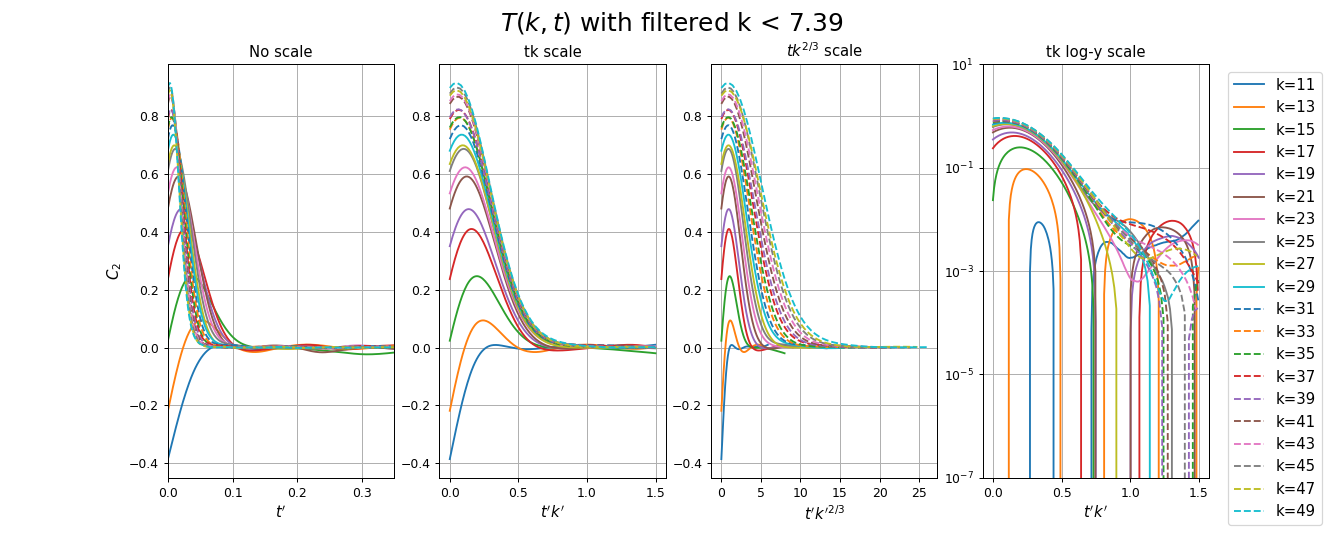

In [69]:
tk1 = 0.0
tk2 = 1.5

#transf_norm = np.ones_like(t)    # no normalization
#transf_norm = 1.0/transfer[0,:]
#transf_norm = 1.0/correlation[0,:]
transf_norm = 1.0/dissipation_spec
#transf_norm = 1.0/np.amax(transfer, axis=0)

fig, (norm_scale, tk_scale, tk23_scale, log_scale) = plt.subplots(nrows=1, ncols=4,figsize=(15,6))
for ik in indices_of_k_to_plot :
    a = np.searchsorted(t/t0*k[ik]/kL, tk1)
    b = np.searchsorted(t/t0*k[ik]/kL, tk2)
    norm_scale.plot(t/t0, transfer_f2[:,ik]*transf_norm[ik])
    tk_scale.plot(t[a:b]/t0*(k[ik]/kL), transfer_f2[a:b,ik]*transf_norm[ik])
    tk23_scale.plot(t[a:b]/t0*(k[ik]/kL)**(2.0), transfer_f2[a:b,ik]*transf_norm[ik])
    log_scale.semilogy(t[a:b]/t0*(k[ik]/kL), transfer_f2[a:b,ik]*transf_norm[ik], label='k=%2.f' % (k[ik]))
norm_scale.set(title='No scale', ylabel=r'$C_2$', xlabel=r'$t^\prime$', xlim=[0, 0.35]); norm_scale.grid()
tk_scale.set(title='tk scale', xlabel=r'$t^\prime k^\prime$'); tk_scale.grid()
tk23_scale.set(title=r'$tk^{2/3}$ scale', xlabel=r'$t^\prime {k^\prime}^{2/3}$', yscale='linear'); tk23_scale.grid()
log_scale.set(title='tk log-y scale', xlabel=r'$t^\prime k^\prime$', ylim=[10e-8, 10.0]); log_scale.grid()
log_scale.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#fig.tight_layout()
fig.suptitle(r'$T(k,t)$ with filtered k < %2.2f' % (cut_off_k2), size=20) 
plt.show()

# Integral decorrelation time scale

In [28]:
integral_decorrelation_time = np.zeros(shape=wavenumbers_length, dtype=float)
for ik in list(range(wavenumbers_length)) : 
    integral_decorrelation_time[ik] = np.trapz(np.nan_to_num(correlation[:,ik]*normalization[ik]), x=t)

In [29]:
#microscale_time 
microscale_time = np.zeros(shape=wavenumbers_length, dtype=float)

#second order right side finite difference scheme for the second derivative
deltaT = t[1] - t[0]
for ik in list(range(wavenumbers_length)) : 
    u = correlation[:,ik]*normalization[ik]
    derivative = (2.0*u[0] - 5.0*u[1] + 4.0*u[2] - u[3])/(deltaT*deltaT)
    microscale_time[ik] = (-derivative)**(-0.5)

/home/gorbunov8a/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


In [30]:
#integral time without microscale
large_lag_integral_decorrelation_time = np.zeros(shape=wavenumbers_length, dtype=float)
for ik in list(range(wavenumbers_length)) : 
    index_of_end_of_microsclace = np.searchsorted(t, 1.1*microscale_time[ik])
    large_lag_integral_decorrelation_time[ik] = np.trapz(correlation[index_of_end_of_microsclace:,ik]*normalization[ik], x=t[index_of_end_of_microsclace:])

<IPython.core.display.Javascript object>


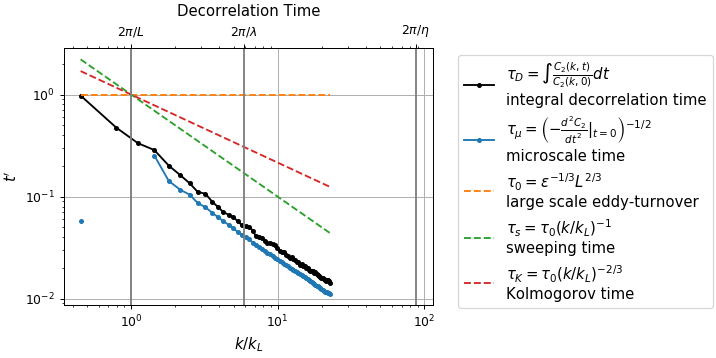

In [31]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(8,4))
ax.plot(k/kL, integral_decorrelation_time/t0,  'k.-', label=r"$\tau_D = \int \frac{C_2(k, t)}{C_2(k, 0)} dt$" "\nintegral decorrelation time")
ax.plot(k/kL, microscale_time/t0,  '.-', label=r"$\tau_\mu = \left(- \frac{d^2 C_2}{d t^2} |_{t=0} \right)^{-1/2}$""\nmicroscale time")
ax.plot(k/kL, np.ones_like(k), '--', label=r"$\tau_0 = \epsilon^{-1/3} L^{2/3}$""\nlarge scale eddy-turnover")
ax.plot(k/kL, np.power(k/kL, -1.0), '--', label=r"$\tau_s = \tau_0 (k/k_L)^{-1}$""\nsweeping time")
ax.plot(k/kL, np.power(k/kL, -2.0/3.0), '--', label=r"$\tau_K =  \tau_0 (k/k_L)^{-2/3}$""\nKolmogorov time")
#ax.plot(k*L, np.power(k*L, -2.0), '--', label=r'$\tau_K =  \tau_0 (k L)^{-2}$')
ax.set(xscale='log', yscale='log', xlabel=r'$k/k_L$', ylabel=r'$t^{\prime}$', title='Decorrelation Time')
ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

vertical_lines = wn_scales/kL
for line in vertical_lines : ax.axvline(x=line, color='gray')
ax2 = ax.twiny()
ax2.set(xscale='log', yscale='log', xlim = ax.get_xlim())
ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])
plt.show()

# Correlation fit

In [32]:
# Define the functions to fit

def fitting_function1(x, a, b, c):   
    return (1-b*x) * np.exp(-a * x**2 + c) 
nb_of_params = 3

# def fitting_function2(x, a, b, c):   
#     return c* np.exp(-a * (x-b)**2.0) 
# nb_of_params = 3

In [33]:
tk1_fit = 0.0
tk2_fit = 1.0

optim_coef1 = np.ndarray(shape=(wavenumbers_length, nb_of_params), dtype=float)
cov_matrix1 = np.ndarray(shape=(wavenumbers_length, nb_of_params, nb_of_params), dtype=float)
for ik in range(wavenumbers_length) :
    a = np.searchsorted(t/t0*k[ik]/kL, tk1_fit)
    b = np.searchsorted(t/t0*k[ik]/kL, tk2_fit)
    xdata = t[a:b]/t0   # t' variable
    #print('[debug] Fitting using', np.count_nonzero(xdata), 'points')
    ydata = transfer_f1[a:b, ik] / dissipation_spec[ik]
    try :
        optim_coef1[ik, :], cov_matrix1[ik, :, :] = curve_fit(fitting_function1, xdata, ydata)
    except :
        print('Failed optimization for ik = ', ik)
        optim_coef1[ik,:].fill(np.nan)
        continue
        
optim_coef2 = np.ndarray(shape=(wavenumbers_length, nb_of_params), dtype=float)
cov_matrix2 = np.ndarray(shape=(wavenumbers_length, nb_of_params, nb_of_params), dtype=float)
for ik in range(wavenumbers_length) :
    a = np.searchsorted(t/t0*k[ik]/kL, tk1_fit)
    b = np.searchsorted(t/t0*k[ik]/kL, tk2_fit)
    xdata = t[a:b]/t0   # t' variable
    #print('[debug] Fitting using', np.count_nonzero(xdata), 'points')
    ydata = transfer_f2[a:b, ik] / dissipation_spec[ik]
    try :
        optim_coef2[ik, :], cov_matrix2[ik, :, :] = curve_fit(fitting_function1, xdata, ydata)
    except :
        print('Failed optimization for ik = ', ik)
        optim_coef2[ik,:].fill(np.nan)
        continue
        
optim_coef_nf = np.ndarray(shape=(wavenumbers_length, nb_of_params), dtype=float)
cov_matrix_nf = np.ndarray(shape=(wavenumbers_length, nb_of_params, nb_of_params), dtype=float)
for ik in range(wavenumbers_length) :
    a = np.searchsorted(t/t0*k[ik]/kL, tk1_fit)
    b = np.searchsorted(t/t0*k[ik]/kL, tk2_fit)
    xdata = t[a:b]/t0   # t' variable
    #print('[debug] Fitting using', np.count_nonzero(xdata), 'points')
    ydata = transfer_nf[a:b, ik] / dissipation_spec[ik]
    try :
        optim_coef_nf[ik, :], cov_matrix_nf[ik, :, :] = curve_fit(fitting_function1, xdata, ydata)
    except :
        print('Failed optimization for ik = ', ik)
        optim_coef_nf[ik,:].fill(np.nan)
        continue

Failed optimization for ik =  0
Failed optimization for ik =  1
Failed optimization for ik =  6
Failed optimization for ik =  7
Failed optimization for ik =  8
Failed optimization for ik =  0
Failed optimization for ik =  1


/home/gorbunov8a/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:799: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Failed optimization for ik =  2
Failed optimization for ik =  3
Failed optimization for ik =  6
Failed optimization for ik =  11
Failed optimization for ik =  13
Failed optimization for ik =  0
Failed optimization for ik =  2


<IPython.core.display.Javascript object>


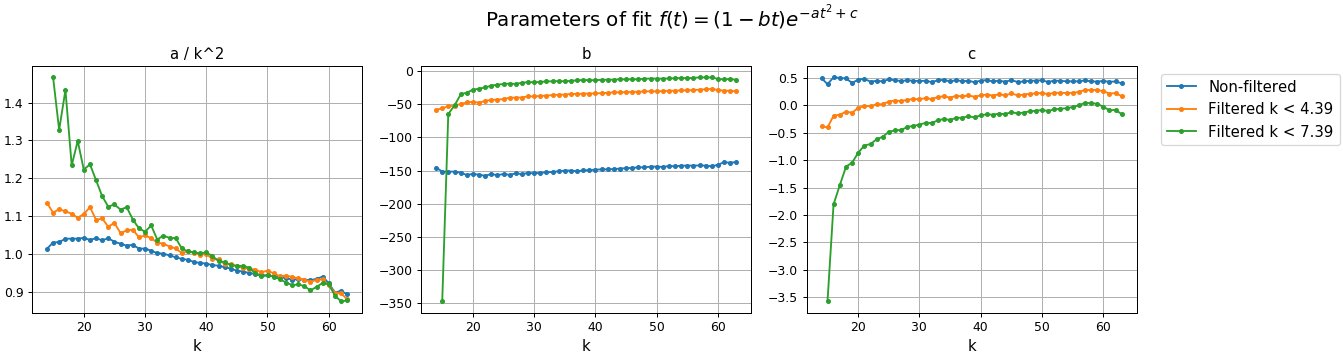

In [76]:
# plot fitting coeffiecients
ik1 = 13; ik2 = wavenumbers_length-1

fig, (ax_a, ax_b, ax_c) = plt.subplots(nrows=1, ncols=3,figsize=(15,4), constrained_layout=True)

ax_a.plot(k[ik1:ik2], optim_coef_nf[ik1:ik2, 0]/(k[ik1:ik2])**2.0, '.-')
ax_b.plot(k[ik1:ik2], optim_coef_nf[ik1:ik2, 1], '.-')
ax_c.plot(k[ik1:ik2], optim_coef_nf[ik1:ik2, 2], '.-', label='Non-filtered')

ax_a.plot(k[ik1:ik2], optim_coef1[ik1:ik2, 0]/(k[ik1:ik2])**2.0, '.-')
ax_b.plot(k[ik1:ik2], optim_coef1[ik1:ik2, 1], '.-')
ax_c.plot(k[ik1:ik2], optim_coef1[ik1:ik2, 2], '.-', label='Filtered k < %2.2f' % (cut_off_k1))

ax_a.plot(k[ik1:ik2], optim_coef2[ik1:ik2, 0]/(k[ik1:ik2])**2.0, '.-')
ax_b.plot(k[ik1:ik2], optim_coef2[ik1:ik2, 1], '.-')
ax_c.plot(k[ik1:ik2], optim_coef2[ik1:ik2, 2], '.-', label='Filtered k < %2.2f' % (cut_off_k2))

ax_a.set(title='a / k^2', xlabel='k'); ax_a.grid()
ax_b.set(title='b', xlabel='k', xscale='linear'); ax_b.grid()
ax_c.set(xscale='linear', yscale='linear', title='c', xlabel='k'); ax_c.grid()
ax_c.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.suptitle(r'Parameters of fit $f(t) = (1-b t) e^{-a t^2 + c} $', fontsize=16)
plt.show()

In [25]:
optim_coef1.shape

(64, 3)

<IPython.core.display.Javascript object>


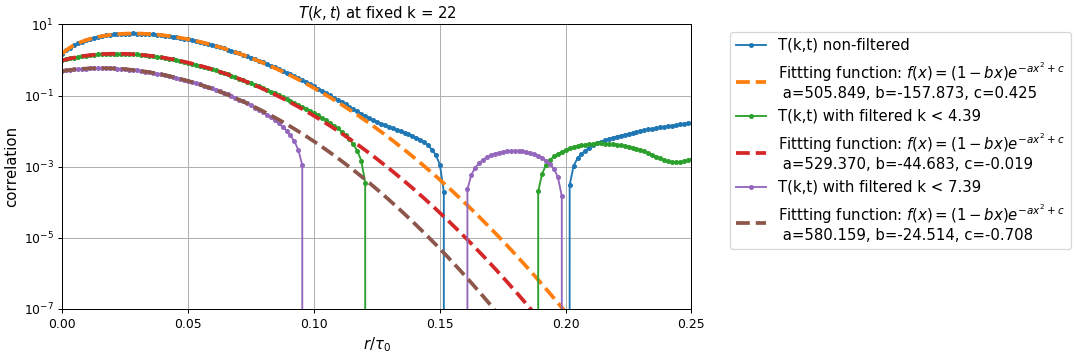

In [77]:
fig, (ax) = plt.subplots(figsize=(12,4), constrained_layout=True)
x = t/t0
ik = 21

ax.plot(x, transfer_nf[:,ik] / dissipation_spec[ik], '.-', label='T(k,t) non-filtered')
ax.plot(x, fitting_function1(x, *optim_coef_nf[ik,:]), '--', linewidth=3, label=r'Fittting function: $f(x) = (1-bx) e^{-a x^2 + c}$' + "\n" + ' a=%5.3f, b=%5.3f, c=%5.3f' % tuple(optim_coef_nf[ik,:]))

ax.plot(x, transfer_f1[:,ik] / dissipation_spec[ik], '.-', label='T(k,t) with filtered k < %2.2f' % (cut_off_k1))
ax.plot(x, fitting_function1(x, *optim_coef1[ik,:]), '--', linewidth=3, label=r'Fittting function: $f(x) = (1-bx) e^{-a x^2 + c}$' + "\n" + ' a=%5.3f, b=%5.3f, c=%5.3f' % tuple(optim_coef1[ik,:]))

ax.plot(x, transfer_f2[:,ik] / dissipation_spec[ik], '.-', label='T(k,t) with filtered k < %2.2f' % (cut_off_k2))
ax.plot(x, fitting_function1(x, *optim_coef2[ik,:]), '--', linewidth=3, label=r'Fittting function: $f(x) = (1-bx) e^{-a x^2 + c}$' + "\n" + ' a=%5.3f, b=%5.3f, c=%5.3f' % tuple(optim_coef2[ik,:]))

ax.set(yscale="log", ylabel='correlation', xlabel=r'$r/\tau_0$', title=r'$T(k,t)$ at fixed k = %2.0f' % k[ik]); ax.grid()
ax.set(ylim=(10e-8,10))
ax.set(xlim=(0.0,0.25))
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()